# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
df=pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

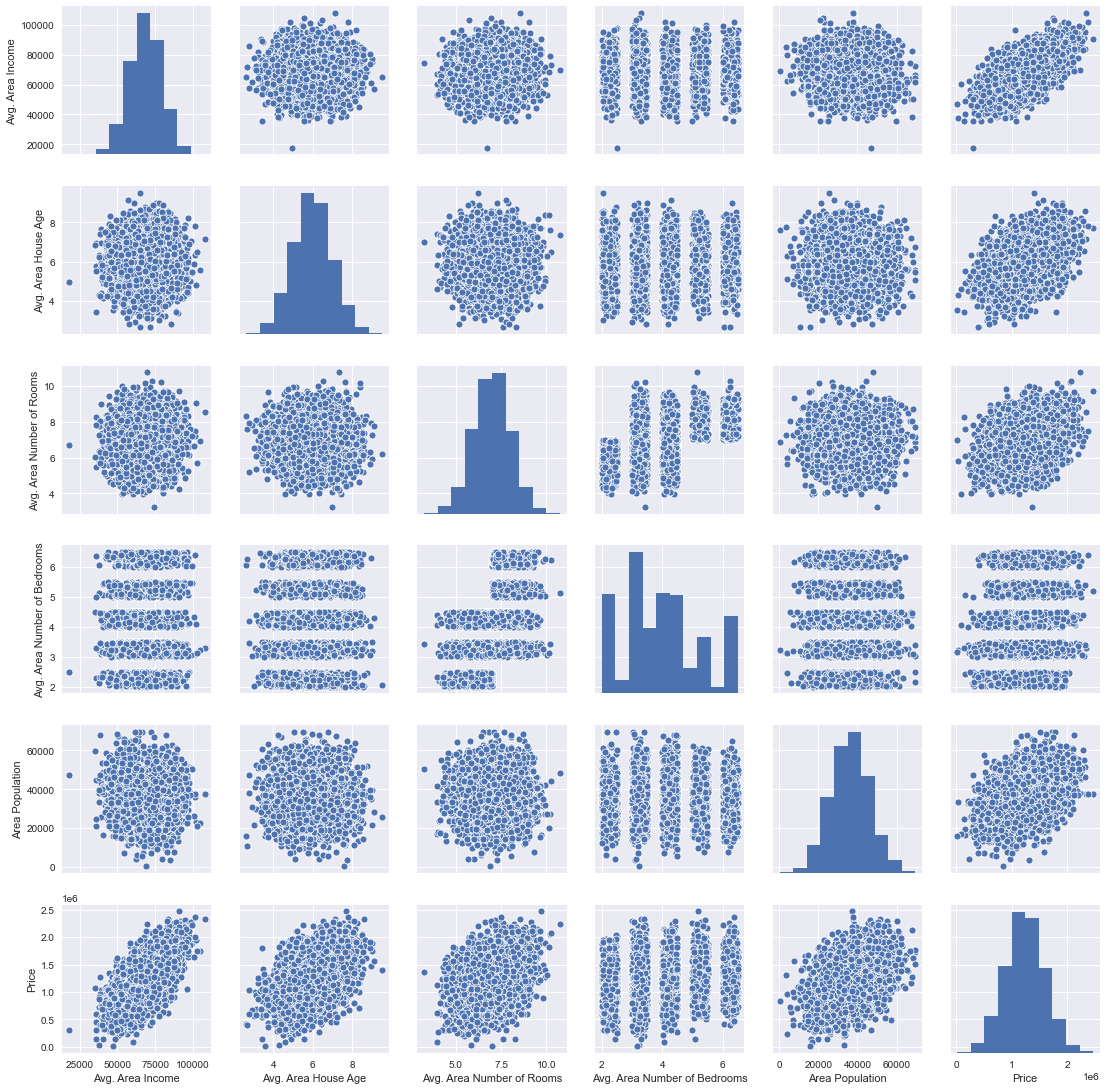

In [8]:
sns.pairplot(df) # all of the data frame

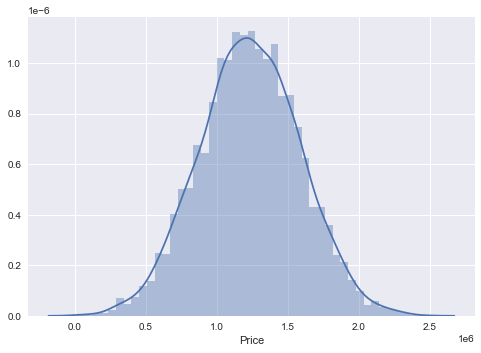

In [10]:
sns.distplot(df["Price"]) #target variable

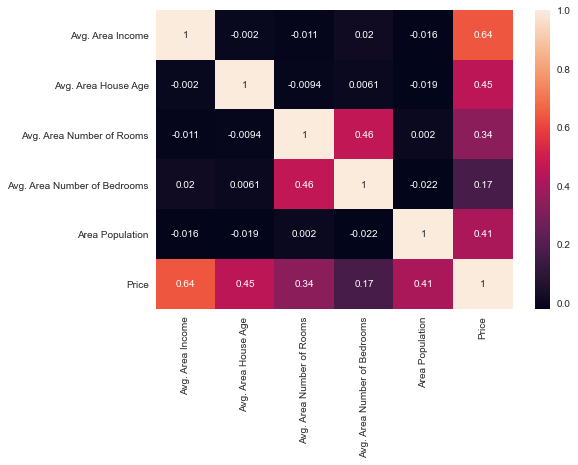

In [13]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [16]:
y=df["Price"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=101)

In [24]:
X_train.shape

(3000, 5)

In [25]:
X_test.shape

(2000, 5)

In [26]:
y_train.describe()

count    3.000000e+03
mean     1.228450e+06
std      3.508083e+05
min      1.593866e+04
25%      9.971789e+05
50%      1.232669e+06
75%      1.463758e+06
max      2.469066e+06
Name: Price, dtype: float64

In [27]:
y_test.describe()

count    2.000000e+03
mean     1.237506e+06
std      3.565726e+05
min      3.114052e+04
25%      9.990740e+05
50%      1.232715e+06
75%      1.474835e+06
max      2.330290e+06
Name: Price, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
print(lm.intercept_)

-2640159.796852679


In [35]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [36]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [41]:
cdf = pd.DataFrame(data=lm.coef_,index=X.columns,columns=["Coeff"])
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [45]:
from sklearn.datasets import load_boston

In [62]:
boston = load_boston()

In [63]:
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [64]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [69]:
boston.target.mean()

22.532806324110677

In [71]:
boston.target.std()

9.188011545278203

In [72]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


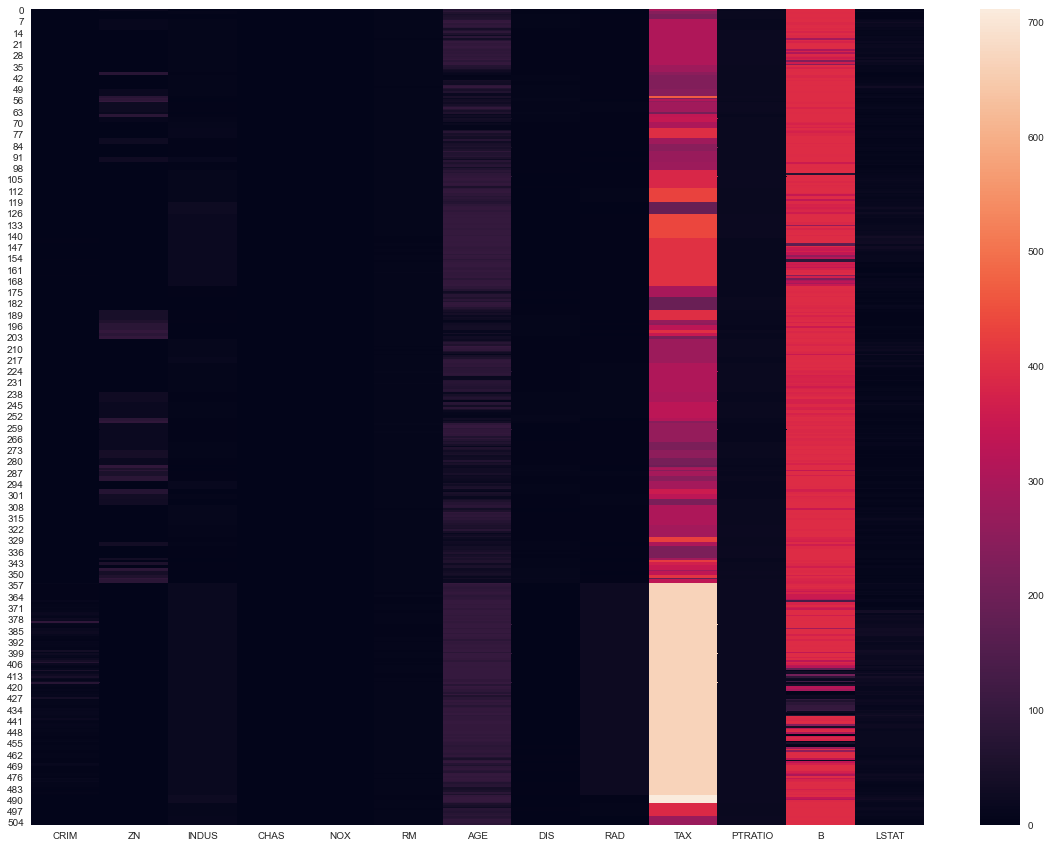

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(boston_df)

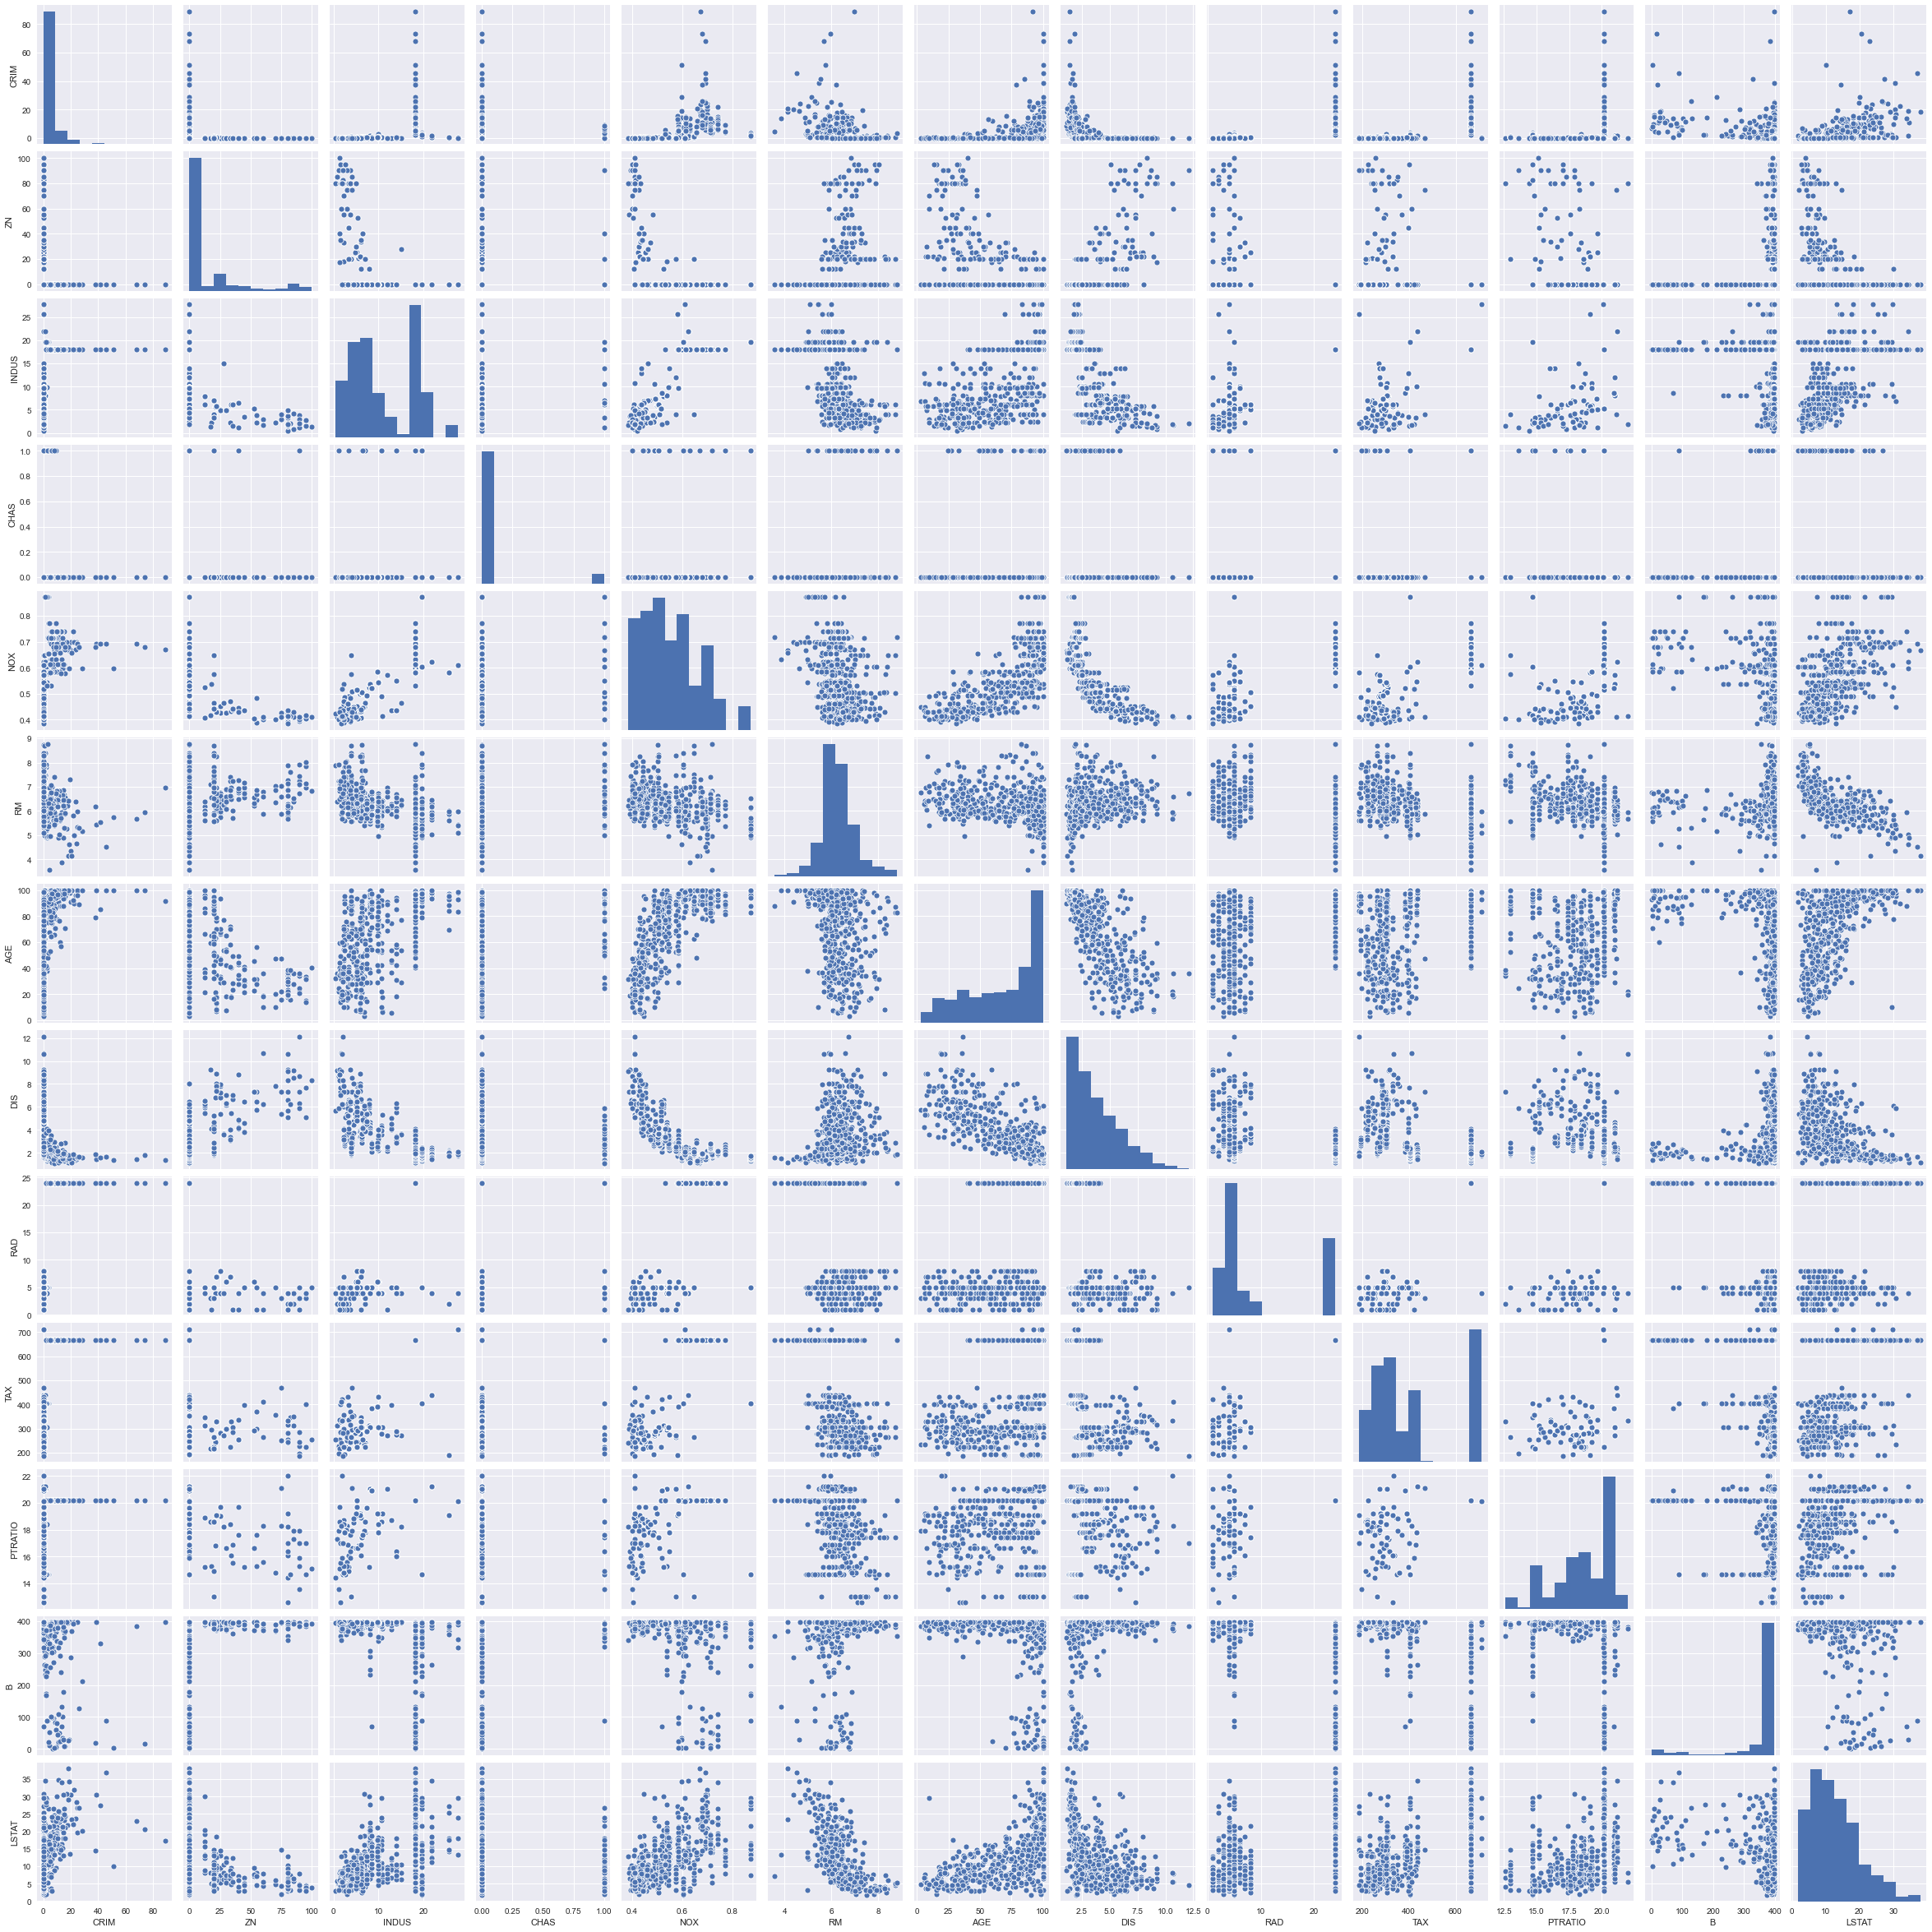

In [76]:
sns.pairplot(boston_df) # all of the data frame

In [78]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [83]:
X,y=load_boston(return_X_y=True)

In [84]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [85]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [86]:
boston_train, boston_test, target_train, target_test = train_test_split(boston_df,
                                                                        boston.target,
                                                                        test_size=0.4)

In [88]:
boston_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 487 to 36
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     303 non-null    float64
 1   ZN       303 non-null    float64
 2   INDUS    303 non-null    float64
 3   CHAS     303 non-null    float64
 4   NOX      303 non-null    float64
 5   RM       303 non-null    float64
 6   AGE      303 non-null    float64
 7   DIS      303 non-null    float64
 8   RAD      303 non-null    float64
 9   TAX      303 non-null    float64
 10  PTRATIO  303 non-null    float64
 11  B        303 non-null    float64
 12  LSTAT    303 non-null    float64
dtypes: float64(13)
memory usage: 43.1 KB


In [89]:
boston_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 258 to 338
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     203 non-null    float64
 1   ZN       203 non-null    float64
 2   INDUS    203 non-null    float64
 3   CHAS     203 non-null    float64
 4   NOX      203 non-null    float64
 5   RM       203 non-null    float64
 6   AGE      203 non-null    float64
 7   DIS      203 non-null    float64
 8   RAD      203 non-null    float64
 9   TAX      203 non-null    float64
 10  PTRATIO  203 non-null    float64
 11  B        203 non-null    float64
 12  LSTAT    203 non-null    float64
dtypes: float64(13)
memory usage: 22.2 KB


In [94]:
target_test.mean()

23.042364532019707

In [95]:
target_train.mean()

22.191419141914192

In [122]:
lm.fit(boston_train,target_train)

LinearRegression()

In [97]:
print(lm.intercept_)

43.53883593230603


In [98]:
lm.coef_

array([-1.58105427e-01,  6.16709473e-02, -7.14472400e-02,  1.40803605e+00,
       -2.10821296e+01,  3.41100730e+00, -1.46839947e-02, -2.07110189e+00,
        3.45724543e-01, -1.02451581e-02, -9.71649399e-01,  1.10246183e-02,
       -5.18419067e-01])

In [100]:
boston_coef=pd.DataFrame(data=lm.coef_,index=boston.feature_names,columns=["Boston Coef"])
boston_coef

,Boston Coef
CRIM,-0.158105
ZN,0.061671
INDUS,-0.071447
CHAS,1.408036
NOX,-21.082130
RM,3.411007
AGE,-0.014684
DIS,-2.071102
RAD,0.345725
TAX,-0.010245


In [106]:
lm.score(boston_test,target_test)

0.7311012143822956

In [123]:
np.mean(lm.predict(boston_test)-target_test)

-0.31797023040616074

In [124]:
boston_predicted=lm.predict(boston_test)

Text(0.5, 1.0, 'ML vs True Prices')

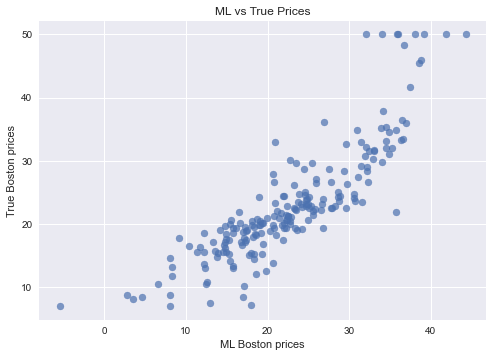

In [138]:
plt.scatter(boston_predicted,target_test,alpha=0.7)
plt.xlabel("ML Boston prices")
plt.ylabel("True Boston prices")
plt.title("ML vs True Prices")

,Boston Predicted,Target test
count,203.000000,203.000000
mean,22.724394,23.042365
std,8.341245,9.118379
min,-5.436538,7.000000
25%,17.117712,17.700000
50%,22.225095,21.200000
75%,28.612917,26.600000
max,44.252316,50.000000


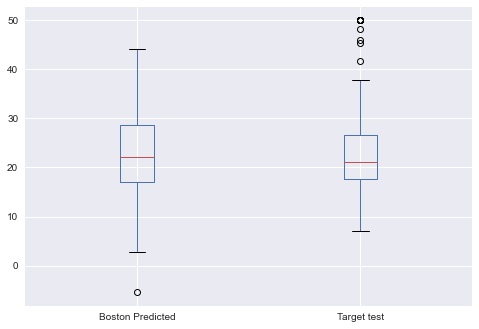

In [213]:
boston_statistics=pd.DataFrame([np.array(boston_predicted),np.array(target_test)],index=["Boston Predicted","Target test"]).T
boston_statistics.plot(kind="box")
boston_statistics.describe()

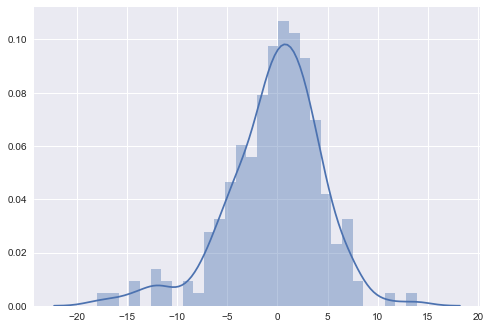

In [218]:
sns.distplot([boston_predicted-target_test],bins=30)

In [219]:
from sklearn import metrics
metrics.mean_absolute_error(boston_predicted,target_test)

3.489511136682222

In [220]:
metrics.mean_squared_error(boston_predicted,target_test)

22.24740814021672

In [221]:
np.sqrt(metrics.mean_squared_error(boston_predicted,target_test))

4.716715821439396

# Predictions for the housing prices

In [131]:
lm.fit(X_train, y_train)

LinearRegression()

In [132]:
print(lm.intercept_)

-2640159.796852679


In [133]:
predictions=lm.predict(X_test)

In [134]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [135]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

Text(0, 0.5, 'Predicted Data')

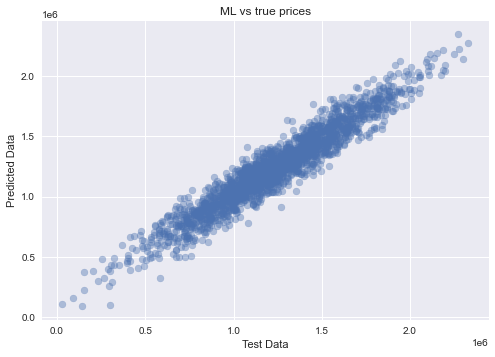

In [139]:
plt.scatter(y_test,predictions,alpha=0.4)
plt.title("ML vs true prices")
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

In [175]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [203]:
np.array(y_test)

array([1251688.61570287,  873048.31964236, 1696977.6628326 , ...,
        151527.08262656, 1343824.21514432, 1906024.63648502])

,Prediction,Real
count,2.000000e+03,2.000000e+03
mean,1.241657e+06,1.237506e+06
std,3.410820e+05,3.565726e+05
min,8.983634e+04,3.114052e+04
25%,1.014735e+06,9.990740e+05
50%,1.239241e+06,1.232715e+06
75%,1.473095e+06,1.474835e+06
max,2.345460e+06,2.330290e+06


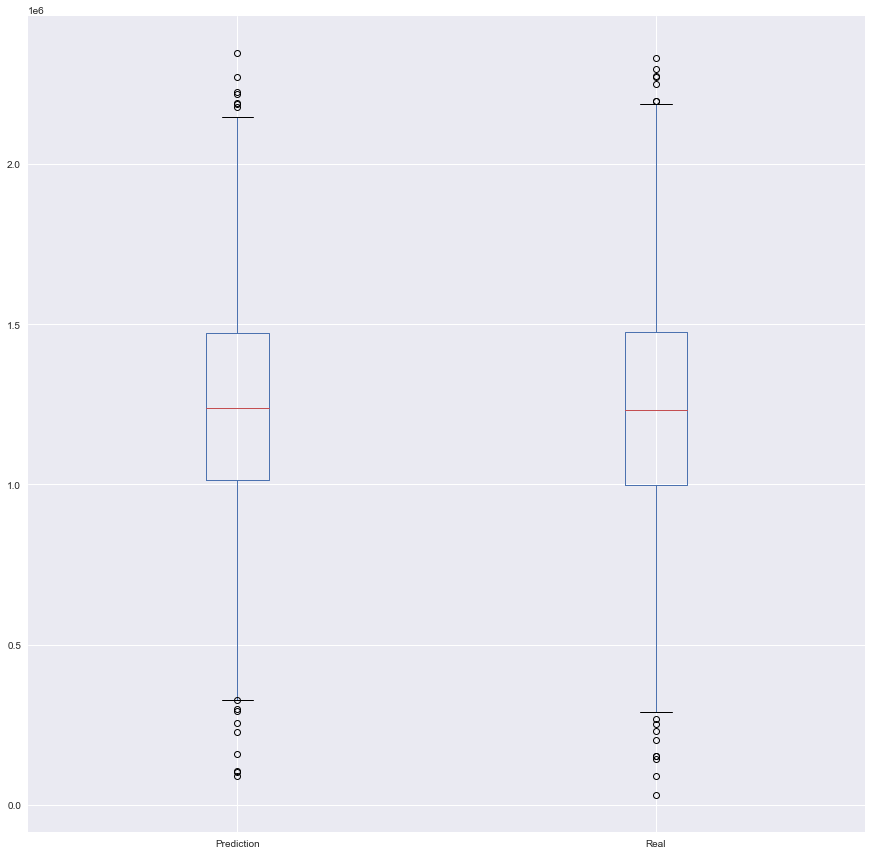

In [201]:
prueba=pd.DataFrame([np.array(predictions),np.array(y_test)],index=["Prediction","Real"]).T
prueba.plot(kind="box",figsize=(15,15))
prueba.describe()

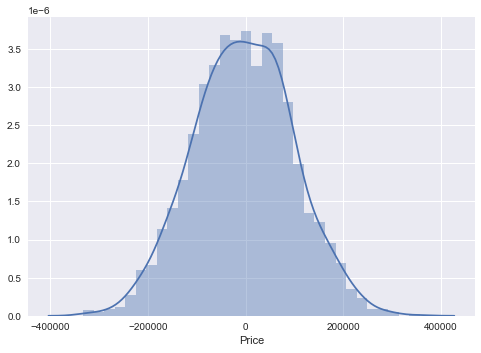

In [204]:
sns.distplot((y_test-predictions)) #Histograms of residuals

In [205]:
from sklearn import metrics

In [206]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914951

In [207]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208992

In [208]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290904